## Vazualize cars dataset

Import libraries and Setup the API keys:

In [1]:
# !pip install tiktoken
import os
import pandas as pd
import evadb
os.environ['OPENAI_API_KEY'] = 'sk-xxx'

### Script generated by GPT

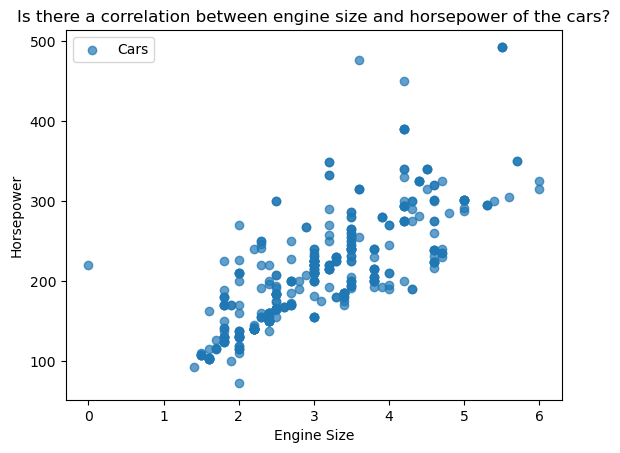

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# plan -
# 1. Use scatter plot to visualize the correlation between engine size and horsepower.
# 2. Extract 'engine_size' and 'horsepower' columns from the dataset.
# 3. Apply necessary transformations if needed (no transformation needed in this case).
data = pd.read_csv('/home/preethi/projects/evadb-viz-generation/viz-cars-data/data/cars_full.csv')

def plot(data: pd.DataFrame):
    # <imports>
    
    # <stub>
    plt.scatter(data['engine_size'], data['horsepower'], label='Cars', alpha=0.7)
    
    # If a single value is required (e.g., mean, median), add a line with legend
    # For this task, no specific single value is required
    
    # Add legend with various colors
    plt.legend()

    # Set labels and title
    plt.xlabel('Engine Size')
    plt.ylabel('Horsepower')
    plt.title('Is there a correlation between engine size and horsepower of the cars?', wrap=True)

    return plt

chart = plot(data)  # data already contains the data to be plotted. Always include this line. No additional code beyond this line.


In [2]:
cursor = evadb.connect().cursor()
print("Connected to EvaDB")

Connected to EvaDB


In [3]:
create_function_query = f"""CREATE FUNCTION IF NOT EXISTS Visualize
            IMPL  './functions/visualize.py';
            """
cursor.query("DROP FUNCTION IF EXISTS Visualize;").execute()
cursor.query(create_function_query).execute()
print("Created Function")

create_table_query = """
CREATE TABLE IF NOT EXISTS CARS (
name TEXT(255),
type TEXT(255),
awd TEXT(255),
rwd TEXT(255),
retail_price INTEGER,
dealer_cost INTEGER,
engine_size FLOAT(64,64),
cyl INTEGER,
horsepower INTEGER,
city_mpg INTEGER,
highway_mpg INTEGER,
weight INTEGER,
wheel_base INTEGER,
len INTEGER,
width INTEGER
);
"""

load_data_query = f""" LOAD CSV 'viz-cars-data/data/cars.csv' INTO CARS;""" 


11-13-2023 19:54:50 WARNING[drop_object_executor:drop_object_executor.py:_handle_drop_function:0086] Function Visualize does not exist, therefore cannot be dropped.


Created Function


Create table and load data:

In [4]:
cursor.query(create_table_query).execute()
cursor.query(load_data_query).execute()

Check scripts to Visualize data:

In [6]:
query= f""" SELECT Visualize(name,type,awd,rwd,retail_price,dealer_cost,engine_size,cyl,horsepower,city_mpg,highway_mpg,weight,wheel_base,len,width) FROM CARS;"""
result = cursor.query(query).execute()

/home/preethi/projects/evadb-auto-label/dataframe/labeling_agent.py:13: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.df = df


Total cost of labeling would be: $ 0.0020405


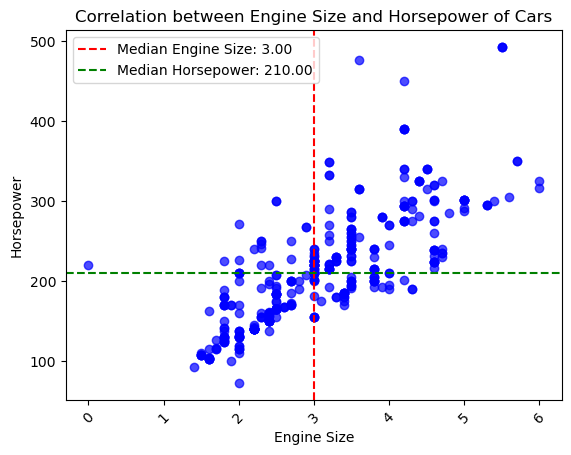

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Stub section
def plot(data: pd.DataFrame):
    plt.scatter(data['engine_size'], data['horsepower'], alpha=0.7, color='blue')
    plt.xlabel('Engine Size')
    plt.ylabel('Horsepower')

    plt.axvline(data['engine_size'].median(), color='red', linestyle='--', label=f'Median Engine Size: {data["engine_size"].median():.2f}')
    plt.axhline(data['horsepower'].median(), color='green', linestyle='--', label=f'Median Horsepower: {data["horsepower"].median():.2f}')

    plt.legend()
    plt.title('Correlation between Engine Size and Horsepower of Cars', wrap=True)
    plt.xticks(rotation=45)

    return plt

chart = plot(pd.read_csv('/home/preethi/projects/evadb-viz-generation/viz-cars-data/data/cars_full.csv'))
plt.show()

<Figure size 1000x600 with 0 Axes>

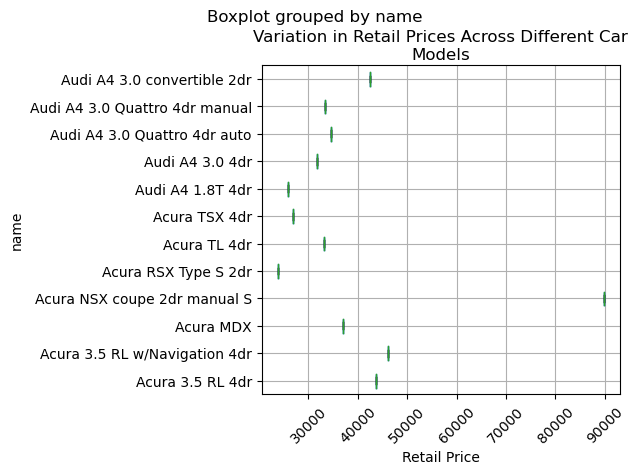

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Stub section
def plot(data: pd.DataFrame):
    plt.figure(figsize=(10, 6))  # Adjust figure size if needed
    data.boxplot(column='retail_price', by='name', vert=False)
    plt.xlabel('Retail Price')
    plt.title('Variation in Retail Prices Across Different Car Models', wrap=True)
    plt.xticks(rotation=45)
    plt.tight_layout()

    return plt

chart = plot(pd.read_csv('/home/preethi/projects/evadb-viz-generation/viz-cars-data/data/cars.csv'))
plt.show()


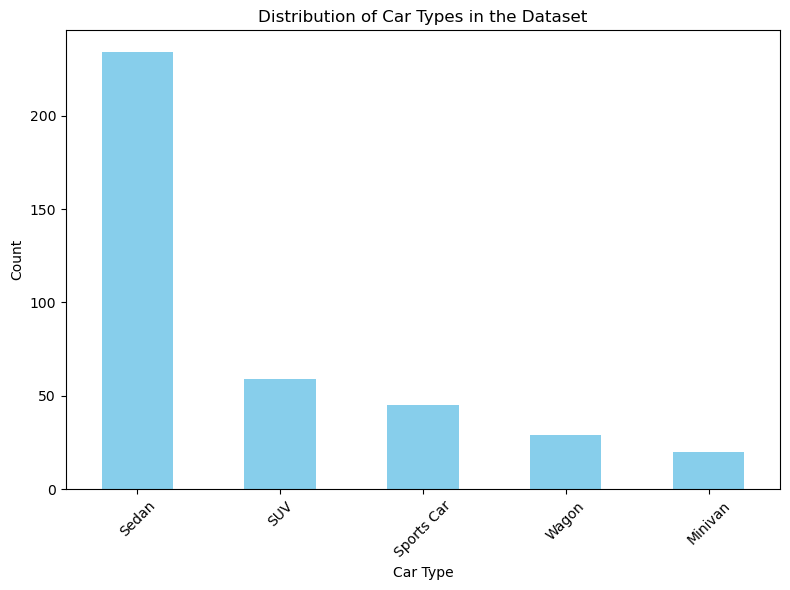

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Stub section
def plot(data: pd.DataFrame):
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    car_type_counts = data['type'].value_counts()
    car_type_counts.plot(kind='bar', color='skyblue')
    plt.xlabel('Car Type')
    plt.ylabel('Count')
    plt.title('Distribution of Car Types in the Dataset', wrap=True)
    plt.xticks(rotation=45)
    plt.tight_layout()

    return plt

chart = plot(pd.read_csv('/home/preethi/projects/evadb-viz-generation/viz-cars-data/data/cars_full.csv'))
plt.show()


Validate results